# <p style="background-color:#3ab1c8;font-family:Cursive;font-size:180%;color:black;text-align:center;border-radius:30px 30px;"><b>ML_Decision Tree - 30 Nov 23</b></p>
<p style="background-color:#f96d00;font-family:Cursive;font-size:150%;color:black;text-align:center;border-radius:10px 10px;"><b>Nash N. Sungur</b></p>

<b>Follow me </b>[Linkedin](www.linkedin.com/in/nash-n-sungur-333869289) | [Git Hub](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0)

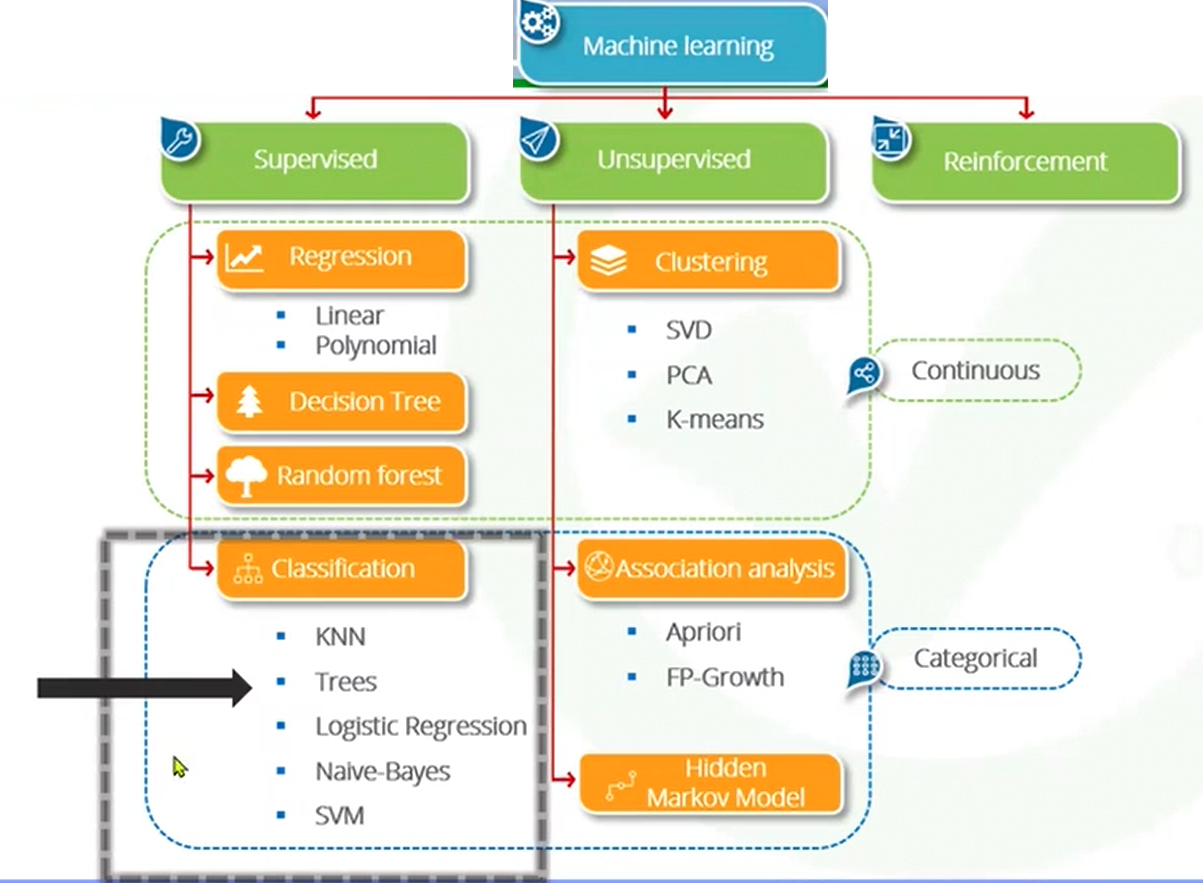

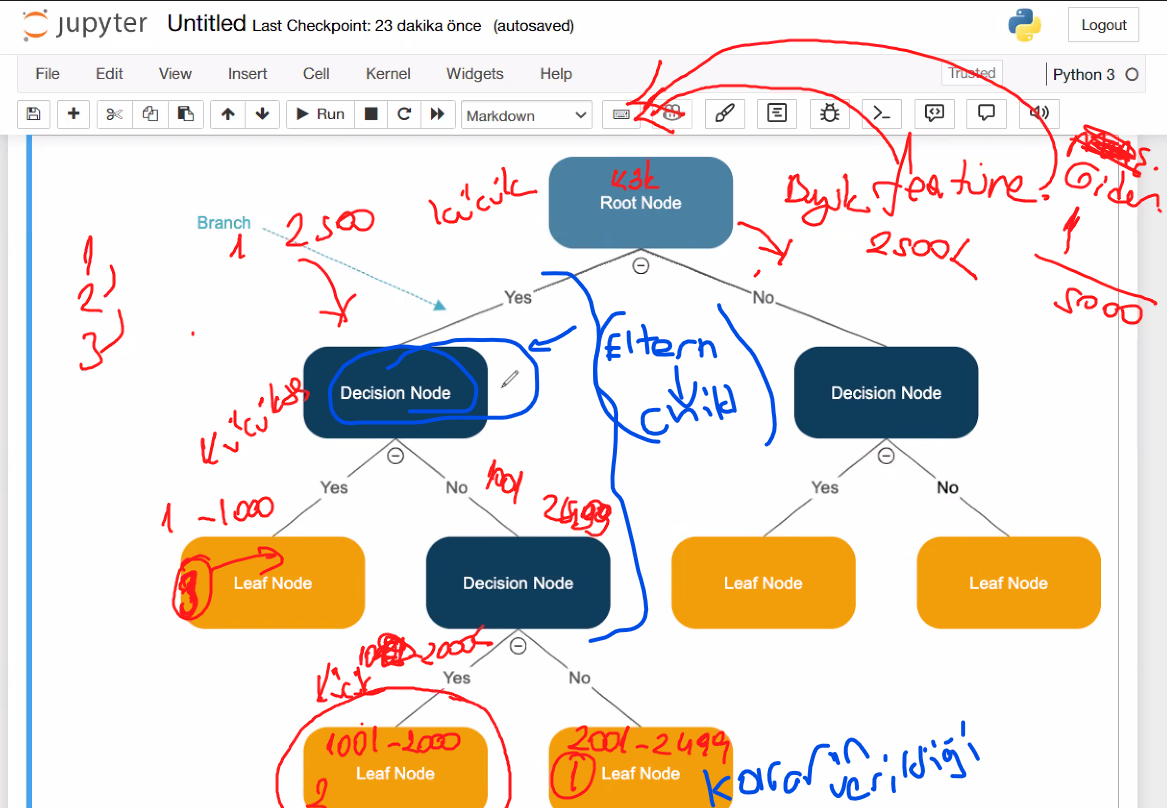

Karar ağaçlarında özellik seçimi yaparken kullanılan üç temel metrik: Entropi, Gini Impurity ve Bilgi Kazancı (Information Gain).
## 1. Entropi
**Tanımı**: Bilgi kazancı, bir özelliğin (feature) veri setini bölmeden önce ve sonra sahip olduğu entropi miktarındaki azalmayı ölçer. Yani, bir özelliğin veri setini ne kadar "iyi" böldüğünün bir göstergesidir.
**Hesaplanması**: Bilgi kazancı, veri setinin toplam entropisinden, bu özelliğe göre bölündükten sonra elde edilen alt kümelerin ağırlıklı entropilerinin çıkarılmasıyla hesaplanır.
- **Formül:**
  $$
  Entropi(T) = -\sum_{i=1}^{n} p_i \times \log_2(p_i)
  $$
  Burada \( p_i \) yine veri seti \( T \) içerisindeki her bir sinifin olasiligini temsil eder.
  **Kullanımı**: Karar ağaçlarında, bilgi kazancı en yüksek olan özellik kök düğüm veya iç düğümler için tercih edilir. Yüksek bilgi kazancı, özelliğin veri setini anlamlı bir şekilde böldüğünü gösterir.
**Not**:Entropi, veri setindeki belirsizliği veya düzensizliği ölçer.
## 2. Gini Impurity
**Tanımı**: Gini impurity, bir özelliğin tek bir sınıfa ait olma ihtimalinin ne kadar düşük olduğunu gösterir. Başka bir deyişle, rastgele seçilen bir öğenin yanlış bir sınıfa atanma ihtimalini ölçer.
**Hesaplanması**: Gini impurity, 1'den veri setindeki her sınıfın oranının karesinin toplamının çıkarılmasıyla hesaplanır.
Kullanımı: Gini impurity, özellikle CART (Classification and Regression Trees) algoritmasında kullanılır. Düşük Gini impurity değerine sahip özellikler tercih edilir, çünkü bu, o özelliğin veri setini daha homojen alt kümelerine ayırdığını gösterir.
- **Formül:**
  $$
  Gini(T) = 1 - \sum_{i=1}^{n} (p_i)^2
  $$
  Burada \( p_i \) veri seti \( T \) içerisindeki i. sınıfın olasiligini temsil eder.
**Not**:Gini impurity, bir özelliğin tek bir sınıfa ait olma ihtimalinin ne kadar düşük olduğunu gösterir.
## 3. Bilgi Kazancı (Information Gain)
**Tanımı:** Information Gain, bir özelliğin (feature) veri setini bölmeden önce ve sonra sahip olduğu entropi miktarındaki azalmayı ölçer. Yani, bir özelliğin veri setini ne kadar "iyi" böldüğünün bir göstergesidir.
**Hesaplanması:** Bilgi kazancı, veri setinin toplam entropisinden, bu özelliğe göre bölündükten sonra elde edilen alt kümelerin ağırlıklı entropilerinin çıkarılmasıyla hesaplanır.
- **Formül:**
  $$
  IG(T, F) = Entropi(T) - \sum_{i=1}^{n} \frac{T_i}{T} \times Entropi(T_i)
  $$
  Burada \( IG(T, F) \) özelliği \( F \) kullanılarak veri seti \( T \) bölündüğünde elde edilen bilgi kazancını, \( T_i \) ise \( F \) özelliğinin i. değeri ile bölünen alt küme boyutunu temsil eder.
**Kullanımı:** Karar ağaçlarında, bilgi kazancı en yüksek olan özellik kök düğüm veya iç düğümler için tercih edilir. Yüksek bilgi kazancı, özelliğin veri setini anlamlı bir şekilde böldüğünü gösterir.
**Not**:Bilgi kazancı, bir özelliğin veri setini bölmeden önce ve sonra sahip olduğu entropi miktarındaki azalmayı ölçer.
Bu metrikler, karar ağaçlarının yapısını ve veri setinin nasıl bölüneceğinin belirlenmesinde önemli bir rol oynar.

Enes hocam: **information gain ile entropy ters orantlı entropy düşük information gain yuksek olmalı**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
import pygwalker as pyg #pip install pygwalker

In [2]:
#pip install pygwalker

# Read Data

Palmer Archipelago (Antarktika) bölgesindeki penguenler hakkında bilgiler içerir.
**Temel özellikleri şunlardır:**
- **species**: Penguenin türünü gösterir. Örnek değerler: Adelie, Chinstrap, Gentoo.
- **island**: Penguenin gözlendiği ada. Örnek değerler: Biscoe, Dream, Torgersen.
- **bill_length_mm**: Penguenin gagasının uzunluğu (milimetre cinsinden).
- **bill_depth_mm**: Penguenin gagasının derinliği (milimetre cinsinden).
- **flipper_length_mm**: Penguenin yüzgeç uzunluğu (milimetre cinsinden).
- **body_mass_g**: Penguenin vücut ağırlığı (gram cinsinden).
- **sex**: Penguenin cinsiyeti.

In [3]:
df = pd.read_csv("penguins_size.csv")
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

# Description

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.describe().T

count         mean         std     min       25%      50%  \
culmen_length_mm   342.0    43.921930    5.459584    32.1    39.225    44.45   
culmen_depth_mm    342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   

                      75%     max  
culmen_length_mm     48.5    59.6  
culmen_depth_mm      18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4750.0  6300.0

In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [8]:
df.isnull().sum().sum()

0

In [9]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [10]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [12]:
# Vahit hocamdan bir kod blogu
def get_unique_values_and_counts(column_name):
    """ This function takes the column name and returns
    unique values and the counts """
    # Get the unique values in the specified column
    unique_values = df[column_name].unique()

    # Count the occurrences of each unique value
    value_counts = df[column_name].value_counts()

    print("Unique values :\n", unique_values)
    print("<----------------------------->")
    print("Value Counts : \n", value_counts)
    print("<________________________________>")

In [13]:
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include='number').columns

In [14]:
for i in categorical_features: get_unique_values_and_counts(i)

Unique values :
 ['Adelie' 'Chinstrap' 'Gentoo']
<----------------------------->
Value Counts : 
 Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64
<________________________________>
Unique values :
 ['Torgersen' 'Biscoe' 'Dream']
<----------------------------->
Value Counts : 
 Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64
<________________________________>
Unique values :
 ['MALE' 'FEMALE' '.']
<----------------------------->
Value Counts : 
 MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64
<________________________________>


In [15]:
get_unique_values_and_counts("sex")

Unique values :
 ['MALE' 'FEMALE' '.']
<----------------------------->
Value Counts : 
 MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64
<________________________________>


In [16]:
df[df["sex"]=="."]

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .

In [17]:
df[df.species=="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [18]:
df.loc[336, "sex"] = "MALE"

In [19]:
df.loc[336, "sex"]

'MALE'

In [20]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

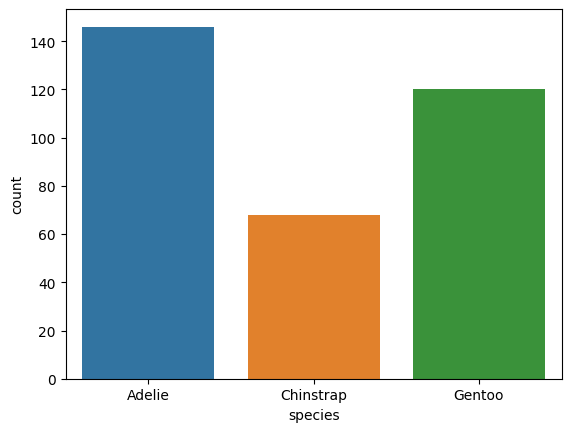

In [21]:
sns.countplot(x="species", data=df);

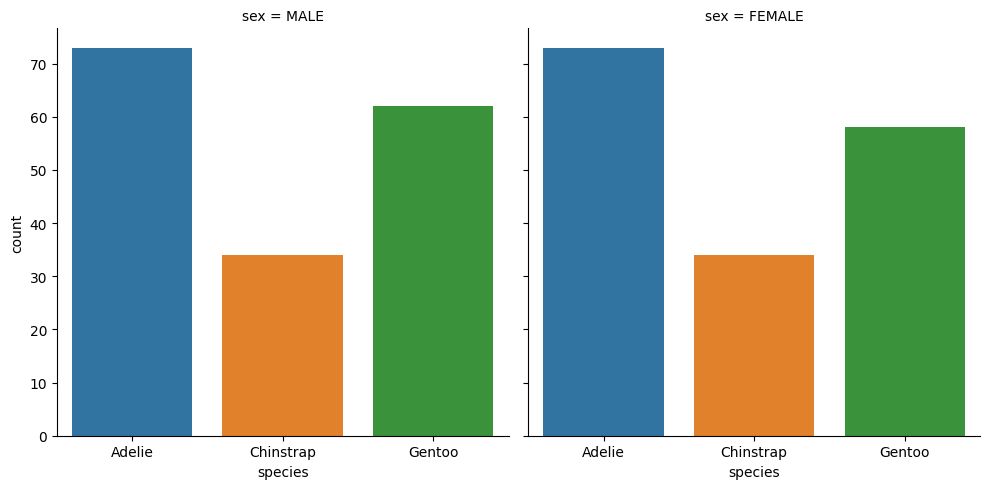

In [22]:
sns.catplot(x="species", data=df, kind = "count", col="sex");

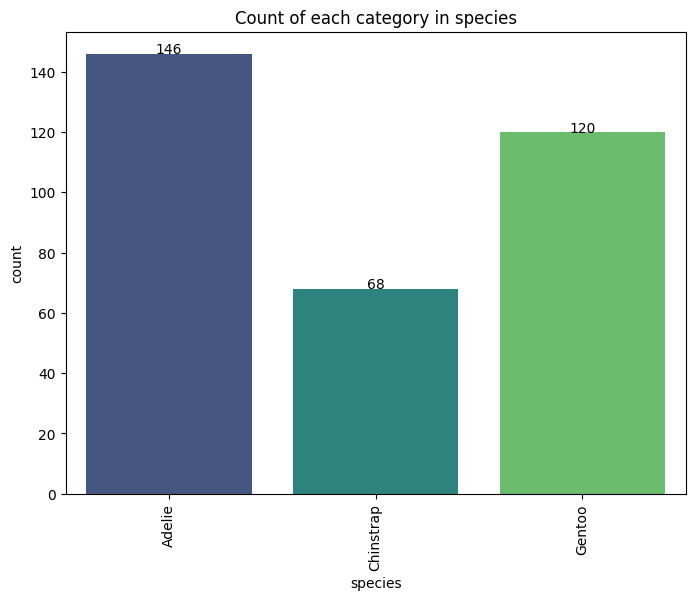

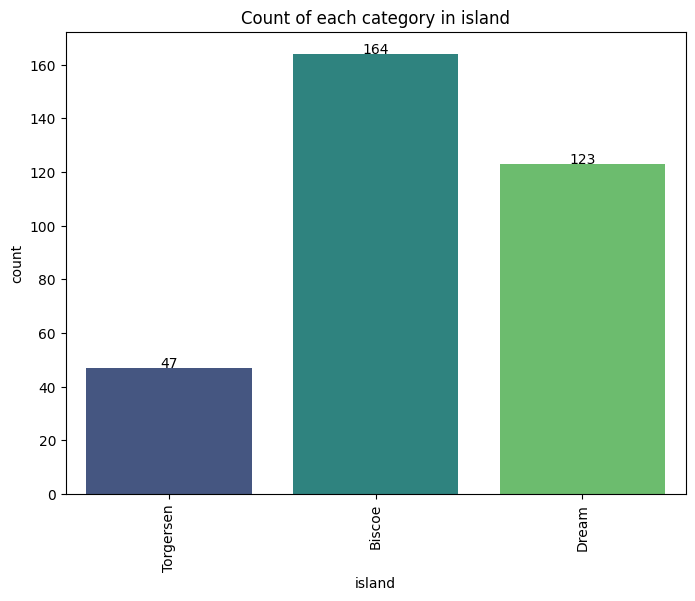

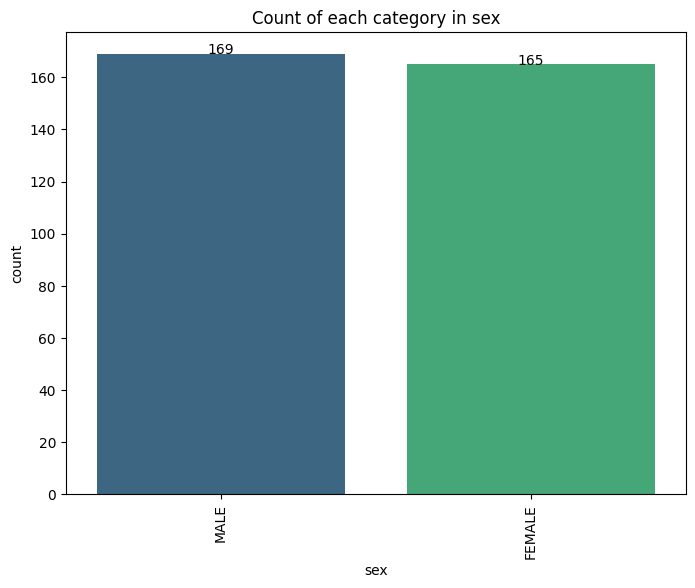

In [23]:
# Kategorik sütunları seçin          Halil hocam dan
categorical_columns = df.select_dtypes(include=['object']).columns
# Her bir kategorik sütun için bar grafiği çizin
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count of each category in {column}')
    # Değerleri grafiğe ekle
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    plt.xticks(rotation=90)  # x eksenindeki etiketleri 90 derece döndür
    plt.show()

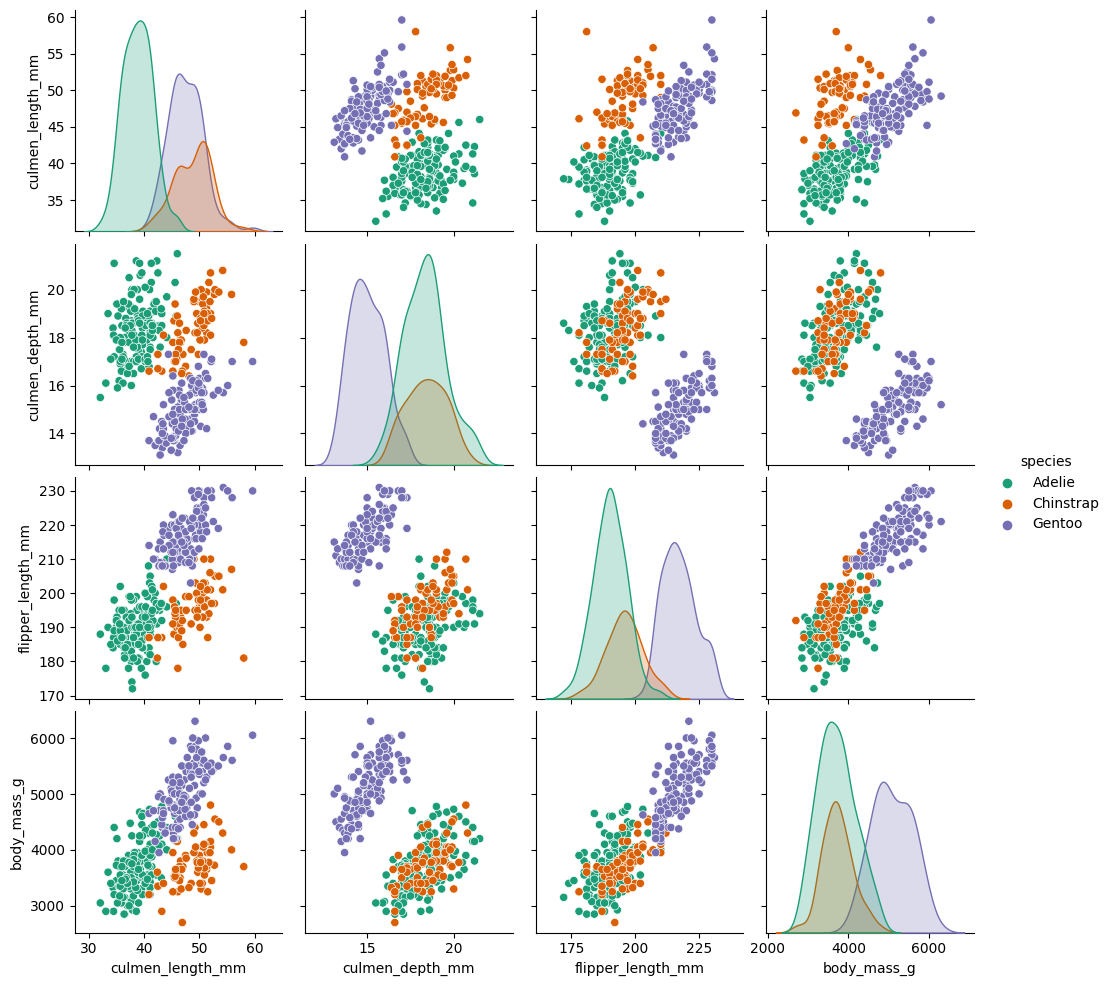

In [24]:
sns.pairplot(df, hue="species", palette="Dark2");

In [25]:
import plotly.express as px  # 3 d grafik

fig = px.scatter_3d(df,
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

In [26]:
pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

In [27]:
df.select_dtypes("number")

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[334 rows x 4 columns]

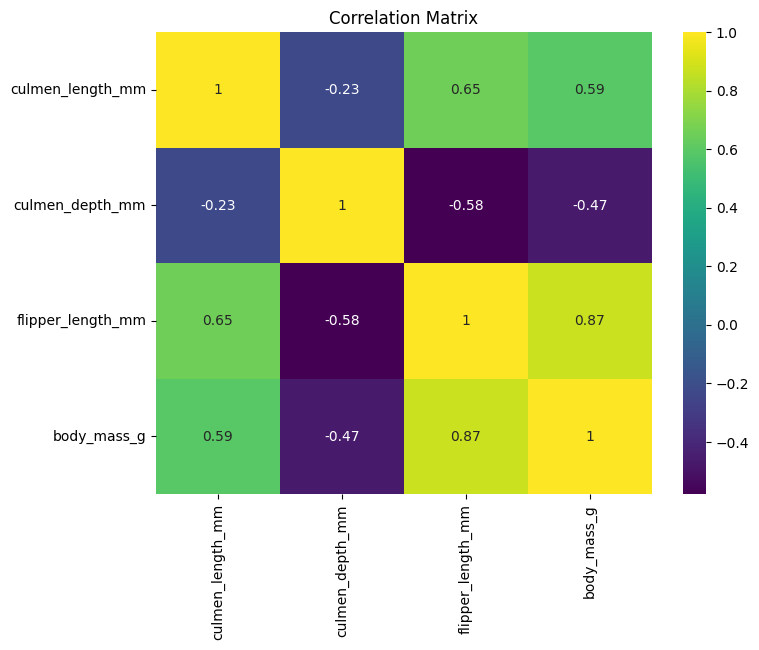

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

In [30]:
df.drop("species", axis=1)

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Torgersen              39.1             18.7              181.0   
1    Torgersen              39.5             17.4              186.0   
2    Torgersen              40.3             18.0              195.0   
4    Torgersen              36.7             19.3              193.0   
5    Torgersen              39.3             20.6              190.0   
..         ...               ...              ...                ...   
338     Biscoe              47.2             13.7              214.0   
340     Biscoe              46.8             14.3              215.0   
341     Biscoe              50.4             15.7              222.0   
342     Biscoe              45.2             14.8              212.0   
343     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[334 rows x 6 columns]

In [31]:
pd.get_dummies(df.drop("species", axis=1), drop_first=True)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     island_Dream  island_Torgersen  sex_MALE  
0               0                 1         1  
1               0                 1         0  
2               0                 1         0  
4               0                 1         0  
5               0                 1         1  
..            ...               ...       ...  
338             0                 0         0  
340             0                 0         0  
341             0                 0         1  
342             0                 0         0  
343             0                 0         1  

[334 rows x 7 columns]

# Train | Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [48]:
X = pd.get_dummies(df.drop("species", axis=1), drop_first=True)
y = df["species"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Modelling

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
DT_model = DecisionTreeClassifier(random_state=101)

In [62]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [63]:
y_pred = DT_model.predict(X_test)

# Model Performance

In [54]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [55]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(f"Test_Set", {model})
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print(f"Train_Set", {model})
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

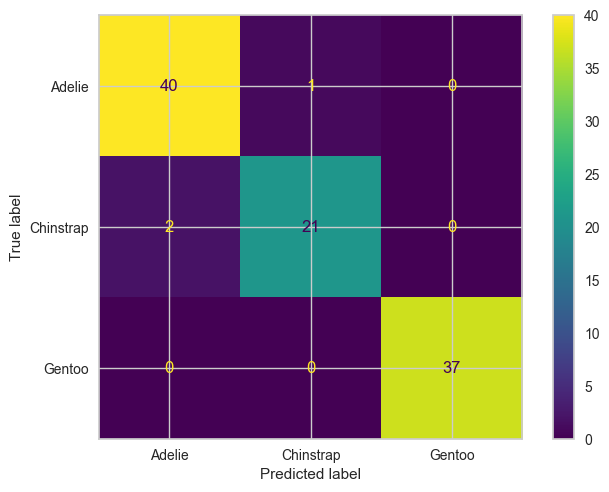

In [64]:
plot_confusion_matrix(DT_model, X_test, y_test);

In [57]:
from yellowbrick.classifier import ClassPredictionError

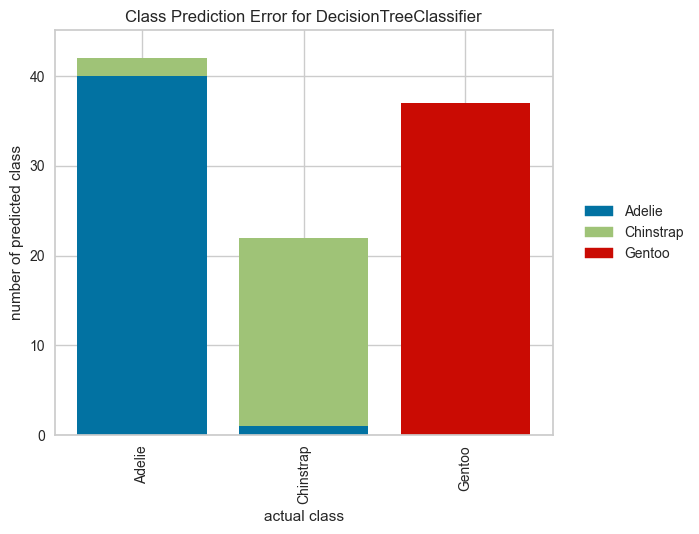

In [65]:
visualizer = ClassPredictionError(DT_model)

visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)

visualizer.poof();

In [66]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set {DecisionTreeClassifier(random_state=101)}
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101


Train_Set {DecisionTreeClassifier(random_state=101)}
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [67]:
# Grid search yapilacagi icin bu Cross validationa ihtiyac yok ama, spor olsun! 

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [68]:
model = DecisionTreeClassifier(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.002099    0.006394       0.958333              0.958333   
2   0.002726    0.002228       0.958333              0.958333   
3   0.002074    0.002112       0.916667              0.916667   
4   0.003309    0.002398       0.956522              0.956522   
5   0.001547    0.003091       1.000000              1.000000   
6   0.001553    0.002084       1.000000              1.000000   
7   0.001037    0.002059       1.000000              1.000000   
8   0.002013    0.002524       1.000000              1.000000   
9   0.002013    0.002090       0.869565              0.869565   
10  0.001011    0.002808       1.000000              1.000000   

    test_recall_micro  test_f1_micro  
1            0.958333       0.958333  
2            0.958333       0.958333  
3            0.916667       0.916667  
4            0.956522       0.956522  
5            1.000000       1.000000  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            0.869565       0.869565  
10           1.000000       1.000000

In [69]:
df_scores.mean()[2:]

test_accuracy           0.965942
test_precision_micro    0.965942
test_recall_micro       0.965942
test_f1_micro           0.965942
dtype: float64

In [70]:
DT_model.feature_importances_

array([0.32591819, 0.05289252, 0.54282921, 0.        , 0.07836008,
       0.        , 0.        ])

In [71]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_,
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

Feature Importance
body_mass_g                  0.000000
island_Torgersen             0.000000
sex_MALE                     0.000000
culmen_depth_mm              0.052893
island_Dream                 0.078360
culmen_length_mm             0.325918
flipper_length_mm            0.542829

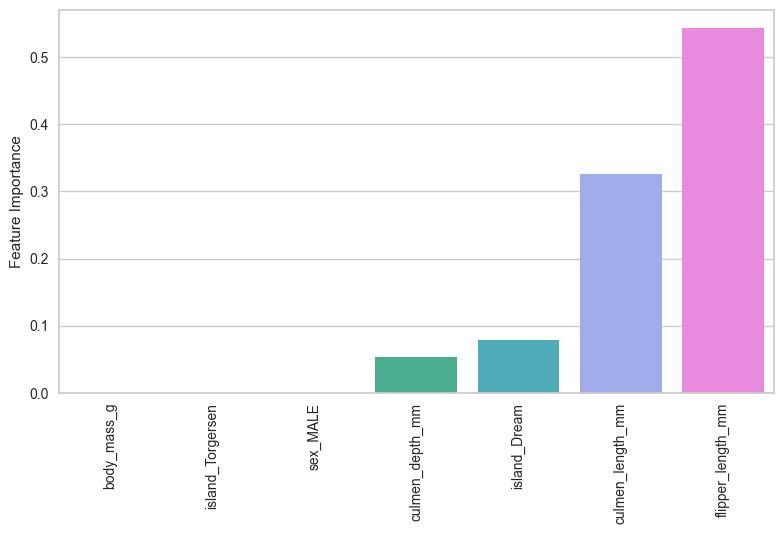

In [72]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [73]:
X2 = X.drop(columns=["flipper_length_mm"])

In [74]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [75]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [76]:
DT2_model.fit(X_train2, y_train2)

DecisionTreeClassifier(random_state=101)

In [78]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set {DecisionTreeClassifier(random_state=101)}
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set {DecisionTreeClassifier(random_state=101)}
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [79]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [80]:
model = DecisionTreeClassifier(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.002040    0.003194       0.958333              0.958333   
2   0.004685    0.002049       0.958333              0.958333   
3   0.001016    0.003582       0.916667              0.916667   
4   0.002025    0.002185       0.956522              0.956522   
5   0.002083    0.001028       1.000000              1.000000   
6   0.001046    0.002432       1.000000              1.000000   
7   0.001014    0.003041       1.000000              1.000000   
8   0.001506    0.003003       1.000000              1.000000   
9   0.001046    0.003019       0.869565              0.869565   
10  0.000993    0.003454       1.000000              1.000000   

    test_recall_micro  test_f1_micro  
1            0.958333       0.958333  
2            0.958333       0.958333  
3            0.916667       0.916667  
4            0.956522       0.956522  
5            1.000000       1.000000  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            0.869565       0.869565  
10           1.000000       1.000000

In [81]:
DT2_model.feature_importances_

array([0.50476185, 0.11399402, 0.        , 0.37039115, 0.        ,
       0.01085298])

In [83]:
df_f_i = pd.DataFrame(index=X2.columns, data = DT2_model.feature_importances_,
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

Feature Importance
body_mass_g                 0.000000
island_Torgersen            0.000000
sex_MALE                    0.010853
culmen_depth_mm             0.113994
island_Dream                0.370391
culmen_length_mm            0.504762

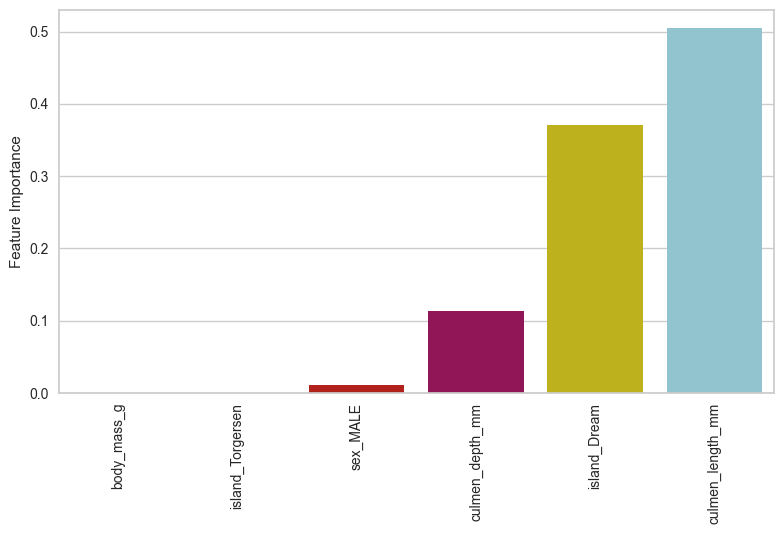

In [84]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

# Grid Search